# "Traffic Level of Service (LOS) Classification in Surabaya Using K-Nearest Neighbors Algorithm"

## Data Preparation

### A.1 Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def set_google_style():
    bg_color = '#FFFFFF'     # Putih Bersih
    text_color = '#202124'   # Hitam Abu 
    grid_color = '#E0E0E0'   # Abu sangat muda
    accent_color = '#1A73E8' #  Blue 
    
    plt.rcParams.update({
        'figure.facecolor': bg_color,
        'axes.facecolor': bg_color,
        'axes.edgecolor': text_color,
        'axes.labelcolor': text_color,
        'text.color': text_color,
        'xtick.color': text_color,
        'ytick.color': text_color,
        'grid.color': grid_color,
        'grid.linestyle': '--',
        'grid.alpha': 0.7,
        'axes.titleweight': 'bold',
        'font.family': 'sans-serif'
    })
    return accent_color

# Aktifkan Tema Terang
primary_blue = set_google_style()
print("✅ Tema Google Light Aktif (Background Putih)")

✅ Tema Google Light Aktif (Background Putih)


### A.2 Read the data

In [ ]:
try:
 df = pd.read_csv('Surabaya Traffic.csv')
 print("Succes read the data")
except Exception as e:
 print(f'Failed to read the data {e}')

Succes read the data


### A.3 view the top 5 data and bottom 5 data

In [ ]:
df.head()

,_id,lokasi_sampling,kode_jalan,d_panjang,d_lebar,klas_jalan,klas_fungsi_jalan,klas_jaringan_jalan,kapasitas_mjki,vol_kendaraan,derajat_kejenuhan,kecepatan_rata_rata,level_of_service
0,1,Jl. Manyar,NaN,NaN,NaN,kota,kolektor,sekunder,7997.184,5199.161858,0.650124,43.3700,C
1,2,Jl. Nginden,NaN,NaN,NaN,kota,kolektor,sekunder,8330.400,6798.102890,0.816060,43.1900,D
2,3,Jl. Banyu Urip,NaN,NaN,NaN,kota,arteri,sekunder,5553.600,4697.296019,0.845811,43.2725,E
3,4,Jl. Jemursari,NaN,NaN,NaN,kota,kolektor,sekunder,8330.400,6294.812071,0.755643,43.7950,D
4,5,Jl. Panjang Jiwo,NaN,NaN,NaN,kota,kolektor,sekunder,8330.400,5845.889767,0.701754,43.4825,C


### A.4 Check the duplicate value

In [ ]:
df.duplicated().sum()

np.int64(0)

### A.5 Check the Missing value

In [ ]:
df.isnull().sum()

_id                     0
lokasi_sampling         0
kode_jalan             13
d_panjang              13
d_lebar                13
klas_jalan              0
klas_fungsi_jalan       0
klas_jaringan_jalan     0
kapasitas_mjki          0
vol_kendaraan           0
derajat_kejenuhan       0
kecepatan_rata_rata     0
level_of_service        0
dtype: int64

### A.6 Check Statistics Data

In [ ]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
_id,13.00,7.00,3.89,1.00,4.00,7.00,10.00,13.00
kode_jalan,0.00,nan,nan,nan,nan,nan,nan,nan
d_panjang,0.00,nan,nan,nan,nan,nan,nan,nan
d_lebar,0.00,nan,nan,nan,nan,nan,nan,nan
kapasitas_mjki,13.00,7138.51,1234.89,5553.60,5775.74,7663.97,8330.40,8330.40
vol_kendaraan,13.00,5559.29,1012.12,3836.40,5020.29,5650.57,6294.81,7307.87
derajat_kejenuhan,13.00,0.78,0.09,0.65,0.72,0.76,0.83,0.98
kecepatan_rata_rata,13.00,43.23,0.65,41.84,42.87,43.27,43.48,44.33


### A.7 Check Outlier Values

Skip karna mengandung missing nilai kosong
Skip karna mengandung missing nilai kosong
Skip karna mengandung missing nilai kosong


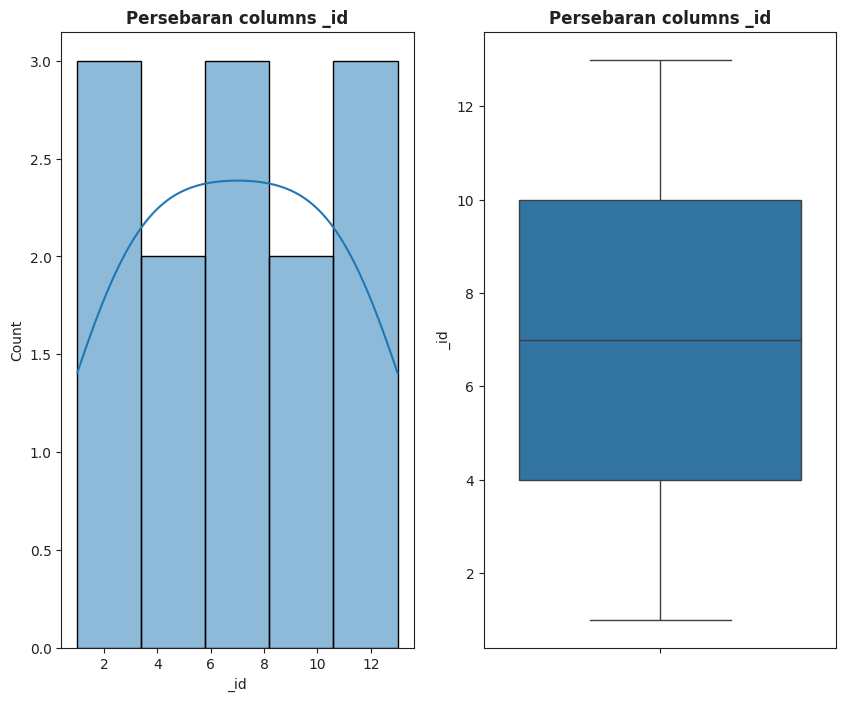

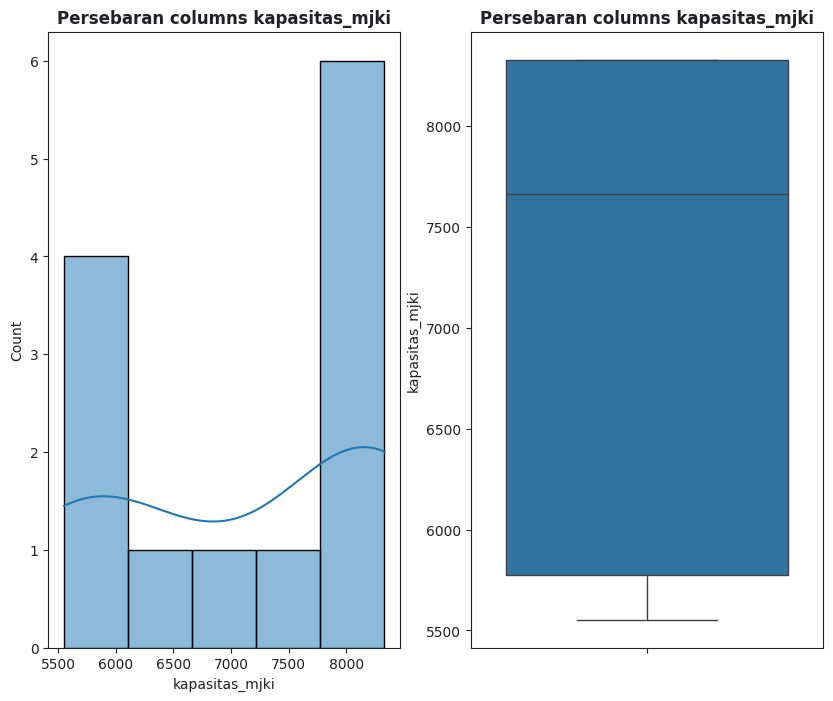

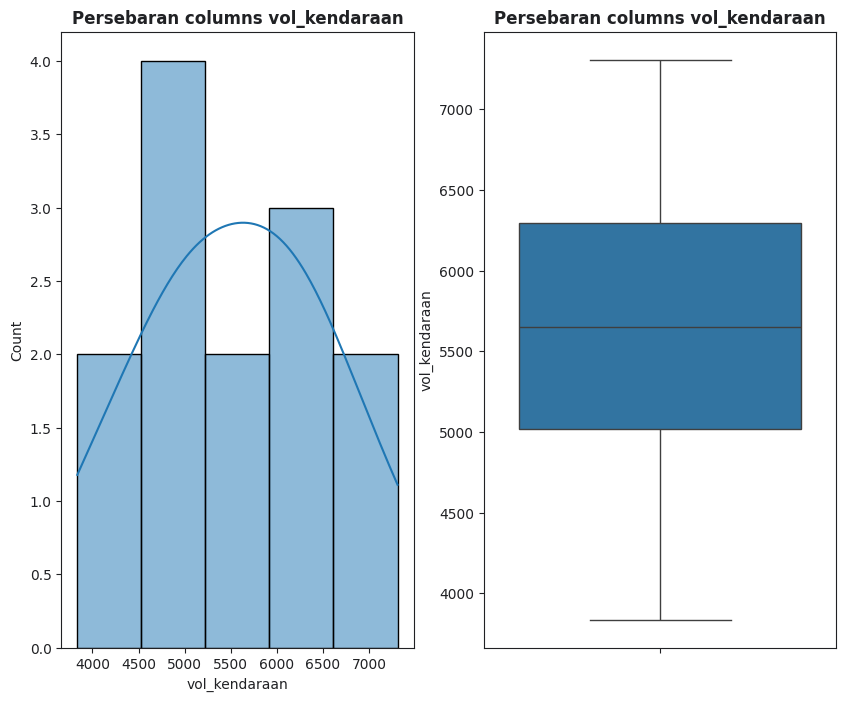

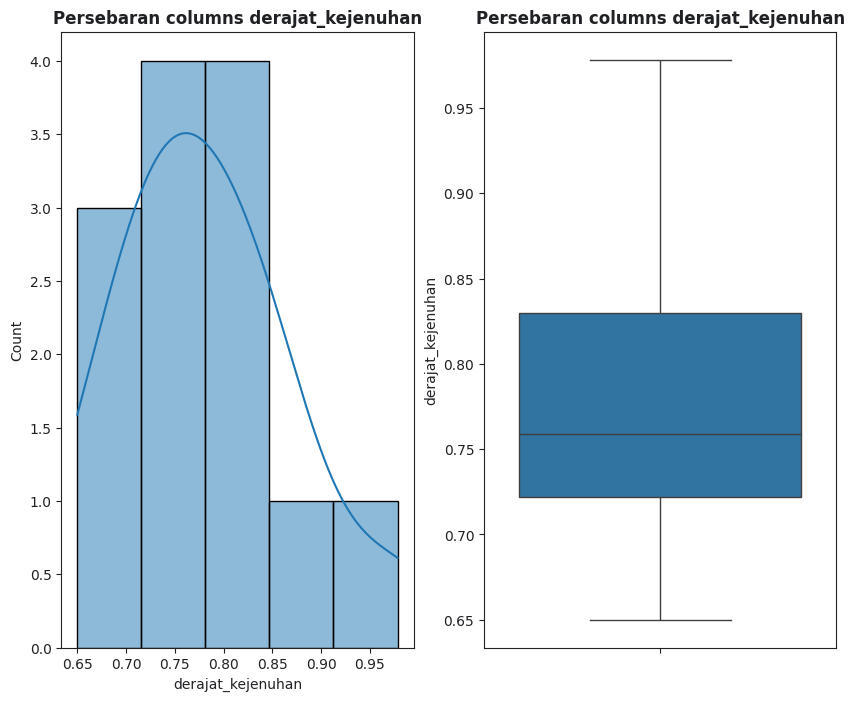

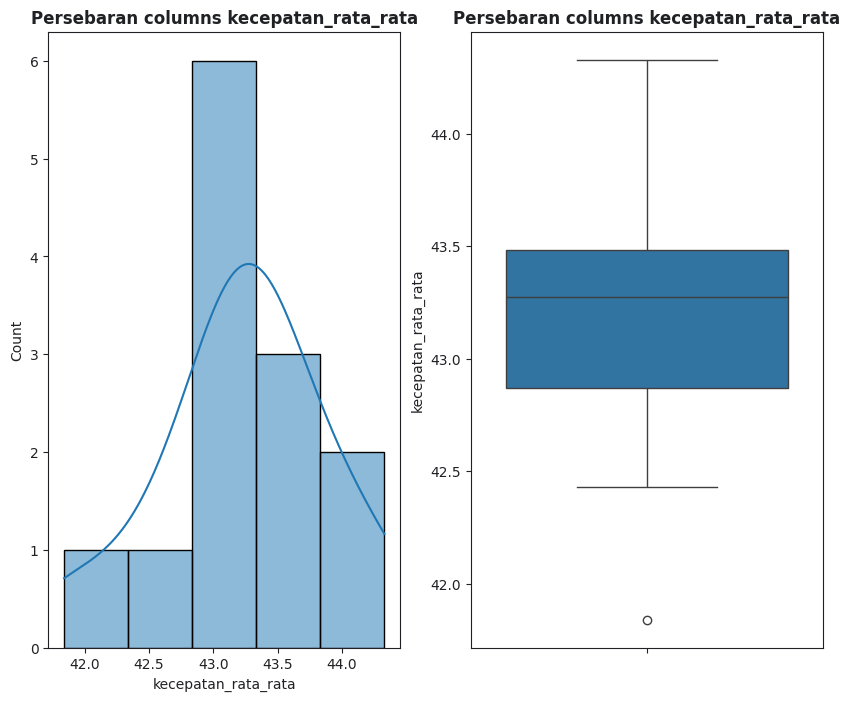

In [ ]:
for col in df.select_dtypes(include="number"):

 # select data
 if df[col].isnull().all():
  print("Skip karna mengandung missing nilai kosong")
  continue

 fig, axes = plt.subplots(1, 2, figsize=(10,8))

 sns.histplot(df[col].dropna(), kde=True, ax = axes[0])
 axes[0].set_title(f"Persebaran columns {col}")

 sns.boxplot(df[col].dropna(), ax = axes[1])
 axes[1].set_title(f"Persebaran columns {col}")

## B.Data Preprocessing

### B.1 Drop NaN Values

In [ ]:
df_clean = df.dropna(axis=1, how='all').copy() # how fungsi hapus jika semua columns NaN

In [ ]:
df_clean.head()

,_id,lokasi_sampling,klas_jalan,klas_fungsi_jalan,klas_jaringan_jalan,kapasitas_mjki,vol_kendaraan,derajat_kejenuhan,kecepatan_rata_rata,level_of_service
0,1,Jl. Manyar,kota,kolektor,sekunder,7997.184,5199.161858,0.650124,43.3700,C
1,2,Jl. Nginden,kota,kolektor,sekunder,8330.400,6798.102890,0.816060,43.1900,D
2,3,Jl. Banyu Urip,kota,arteri,sekunder,5553.600,4697.296019,0.845811,43.2725,E
3,4,Jl. Jemursari,kota,kolektor,sekunder,8330.400,6294.812071,0.755643,43.7950,D
4,5,Jl. Panjang Jiwo,kota,kolektor,sekunder,8330.400,5845.889767,0.701754,43.4825,C


In [ ]:
kota = df[df['klas_jalan'] == 'kota'] 
kota

,_id,lokasi_sampling,kode_jalan,d_panjang,d_lebar,klas_jalan,klas_fungsi_jalan,klas_jaringan_jalan,kapasitas_mjki,vol_kendaraan,derajat_kejenuhan,kecepatan_rata_rata,level_of_service
0,1,Jl. Manyar,NaN,NaN,NaN,kota,kolektor,sekunder,7997.184,5199.161858,0.650124,43.3700,C
1,2,Jl. Nginden,NaN,NaN,NaN,kota,kolektor,sekunder,8330.400,6798.102890,0.816060,43.1900,D
2,3,Jl. Banyu Urip,NaN,NaN,NaN,kota,arteri,sekunder,5553.600,4697.296019,0.845811,43.2725,E
3,4,Jl. Jemursari,NaN,NaN,NaN,kota,kolektor,sekunder,8330.400,6294.812071,0.755643,43.7950,D
4,5,Jl. Panjang Jiwo,NaN,NaN,NaN,kota,kolektor,sekunder,8330.400,5845.889767,0.701754,43.4825,C
5,6,Jl. Jemur Andayani,NaN,NaN,NaN,kota,kolektor,primer,5553.600,3836.402954,0.690796,43.2550,C
6,7,Jl. Kendangsari,NaN,NaN,NaN,kota,kolektor,sekunder,8330.400,6014.612380,0.722008,44.3300,C
7,8,Jl. Rungkut Industri,NaN,NaN,NaN,kota,arteri,sekunder,5553.600,4216.171161,0.759178,42.8700,D
8,9,Jl. Sukomanunggal,NaN,NaN,NaN,kota,arteri,sekunder,6664.320,5028.006898,0.754467,43.9750,D
9,10,Jl. Tanjungsari,NaN,NaN,NaN,kota,arteri,primer,6386.640,5020.288563,0.786061,42.4300,D


### B.2 Encoding Categorical Columns

In [ ]:
for col in df_clean.select_dtypes(include='object'):
 df_clean[col] = df_clean[col].astype('category').cat.codes

 print(f'Columns {col} berhasil di encode menjadi format numerik')

df_clean

Columns lokasi_sampling berhasil di encode menjadi format numerik
Columns klas_jalan berhasil di encode menjadi format numerik
Columns klas_fungsi_jalan berhasil di encode menjadi format numerik
Columns klas_jaringan_jalan berhasil di encode menjadi format numerik
Columns level_of_service berhasil di encode menjadi format numerik


,_id,lokasi_sampling,klas_jalan,klas_fungsi_jalan,klas_jaringan_jalan,kapasitas_mjki,vol_kendaraan,derajat_kejenuhan,kecepatan_rata_rata,level_of_service
0,1,6,0,1,1,7997.184,5199.161858,0.650124,43.3700,0
1,2,8,0,1,1,8330.400,6798.102890,0.816060,43.1900,1
2,3,0,0,0,1,5553.600,4697.296019,0.845811,43.2725,2
3,4,4,0,1,1,8330.400,6294.812071,0.755643,43.7950,1
4,5,9,0,1,1,8330.400,5845.889767,0.701754,43.4825,0
5,6,3,0,1,0,5553.600,3836.402954,0.690796,43.2550,0
6,7,5,0,1,1,8330.400,6014.612380,0.722008,44.3300,0
7,8,10,0,0,1,5553.600,4216.171161,0.759178,42.8700,1
8,9,11,0,0,1,6664.320,5028.006898,0.754467,43.9750,1
9,10,12,0,0,0,6386.640,5020.288563,0.786061,42.4300,1


### B.3 Drop Irelevant Columns

In [ ]:
df_clean = df_clean.drop(columns=['_id'])

## C. Explorasi Data Analysis (EDA)

### C.1 Univariate Analysis

In [ ]:
trash_col = df_clean.columns[df_clean.nunique() == 1]
print(f'Columns Sampah {trash_col.tolist()}')

Columns Sampah ['klas_jalan']


In [ ]:
cv_speed = df_clean['kecepatan_rata_rata'].std() / df_clean['kecepatan_rata_rata'].mean()
print(f"Variansi Kecepatan: {cv_speed:.2%}  (jika > 5% berarti data asli)")

Variansi Kecepatan: 1.50%  (jika > 5% berarti data asli)


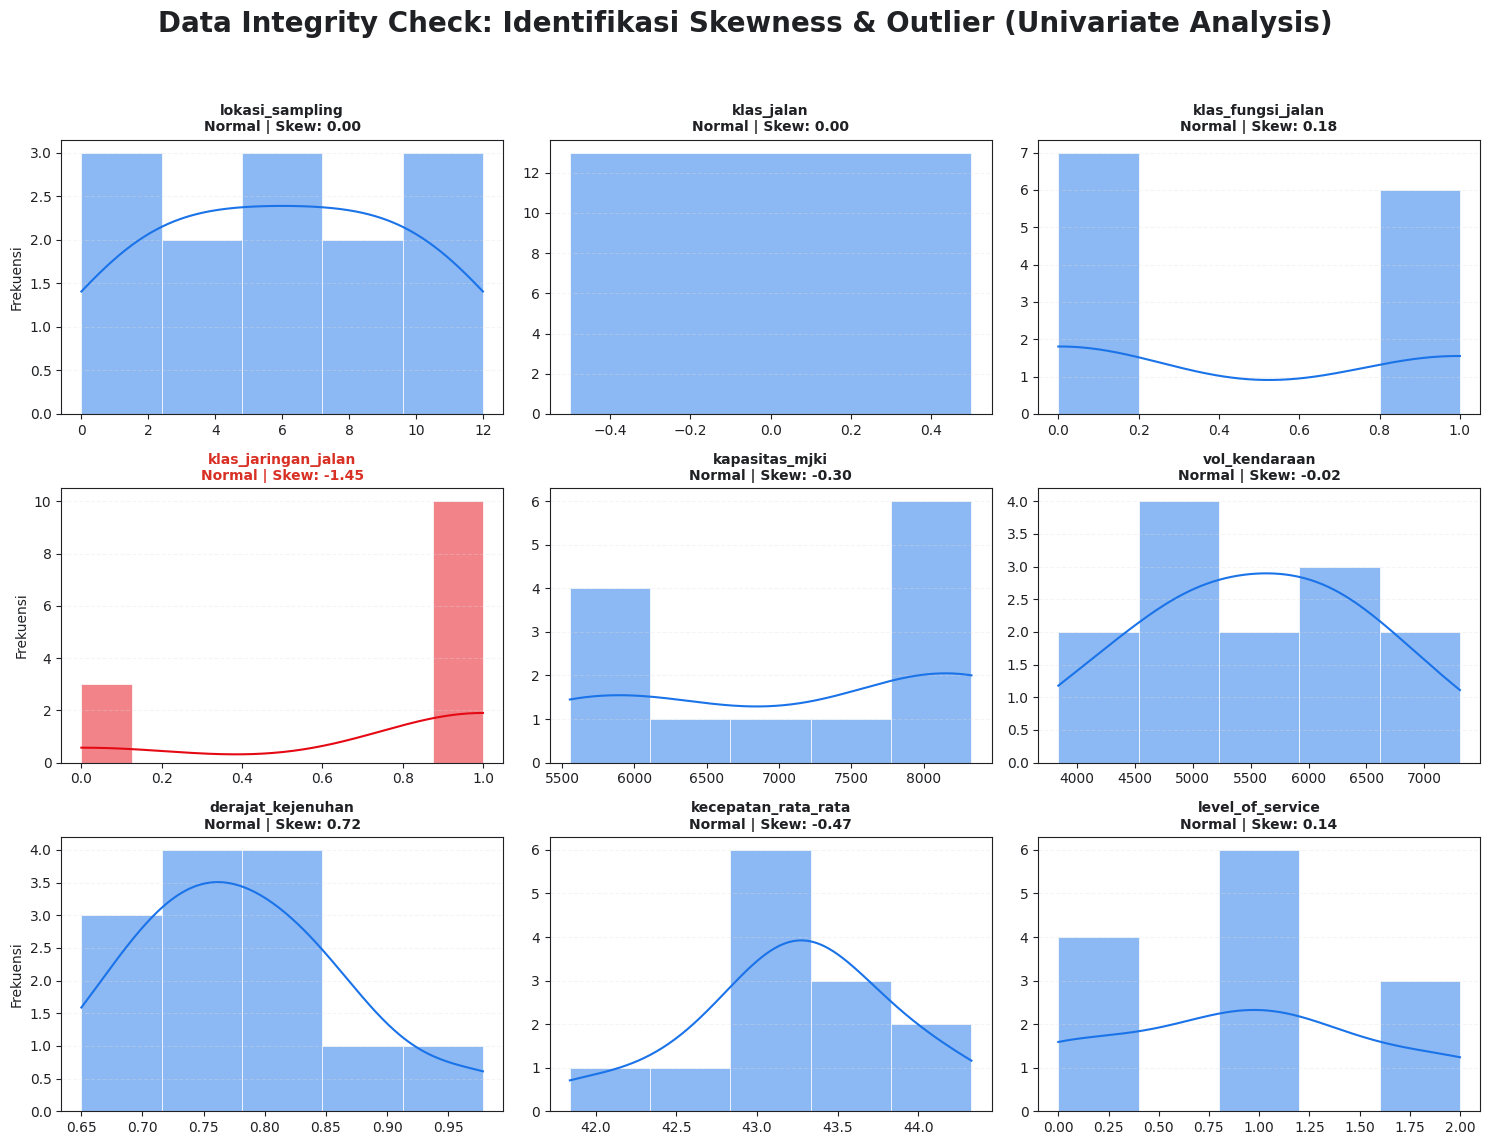

In [ ]:
# Select Numerical Columns
df_plot = df_clean.select_dtypes(include=[np.number])

# Hitung kebutuhan baris grid
n_cols_per_row = 3
n_features = len(df_plot.columns)
n_rows = (n_features + n_cols_per_row - 1) // n_cols_per_row


# Set Up Canvas
plt.figure(figsize=(15, 4 * n_rows))

# Judul Utama 
plt.suptitle("Data Integrity Check: Identifikasi Skewness & Outlier (Univariate Analysis)", 
             fontsize=20, fontweight='bold', y=0.98, color='#202124')

# LOOPING 
for i, col in enumerate(df_plot.columns):
    plt.subplot(n_rows, n_cols_per_row, i + 1)
    
    # A. Hitung Statistik Kemiringan
    skew_val = df_plot[col].skew()
    
   
    # Jika Skew > 1 atau < -1, berarti data miring (tidak normal) -> MERAH
    if abs(skew_val) > 1:
        bar_color = '#E50914'    
        title_color = '#D93025'   
    else:
        bar_color = '#1A73E8'    
        status = "Normal"         
        title_color = '#202124'  
    
    # Plotting Histogram
    sns.histplot(df_plot[col], bins='auto', kde=True, 
                 color=bar_color, edgecolor='white', linewidth=0.5)
    
    # Judul Subplot 
    plt.title(f"{col}\n{status} | Skew: {skew_val:.2f}", 
              fontsize=10, fontweight='bold', color=title_color)
    
    # grid and label
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.xlabel('')
    # Tampilkan label Y hanya di kolom paling kiri agar tidak penuh sesak
    plt.ylabel('Frekuensi' if i % n_cols_per_row == 0 else '')

# rect=[...] memberikan ruang kosong di atas agar Judul Utama tidak tertabrak grafik
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

In [ ]:
df_clean.columns

Index(['lokasi_sampling', 'klas_jalan', 'klas_fungsi_jalan',
       'klas_jaringan_jalan', 'kapasitas_mjki', 'vol_kendaraan',
       'derajat_kejenuhan', 'kecepatan_rata_rata', 'level_of_service'],
      dtype='object')

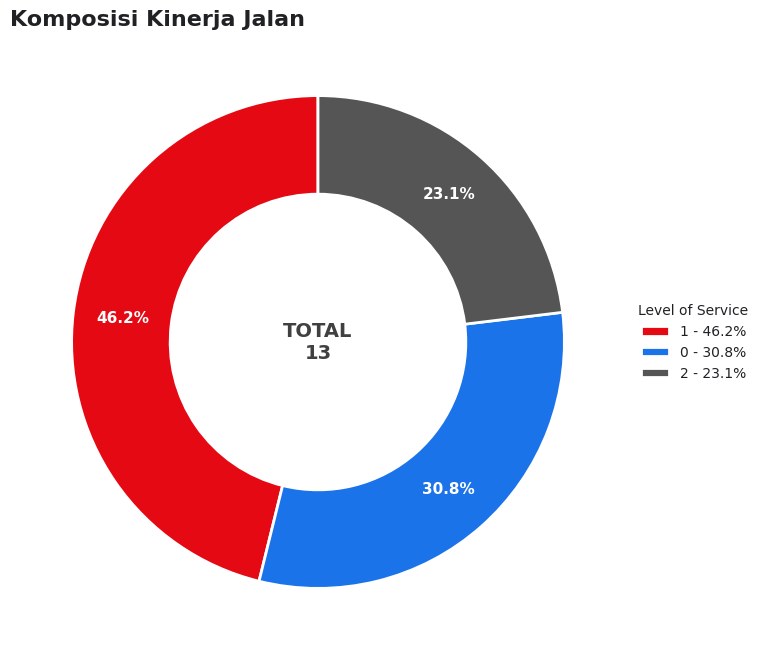

In [ ]:
# 1. Siapkan Data
data_counts = df_clean['level_of_service'].value_counts()

# Urutkan dari yang terbesar agar 'explode' (jika ada) selalu di slice utama
data_counts = data_counts.sort_values(ascending=False)

# Setup Warna & Canvas
plt.figure(figsize=(8, 8))

# Warna Semantik (Pastikan kontras dengan teks putih)
colors = ['#E50914', '#1A73E8', '#555555', '#B3B3B3'] 

# menyembunyikan tulisan jika angkanya < 2% biar tidak berantakan
def clean_autopct(pct):
    return f'{pct:.1f}%' if pct > 2 else ''

plt.pie(data_counts, 
        labels=None, # Hapus label di luar (pindahkan ke Legend biar BERSIH)
        autopct=clean_autopct, # Panggil fungsi filter tadi
        startangle=90,
        colors=colors,
        pctdistance=0.80, # Trik agar tulisan pas di tengah 'daging' donat
        textprops={'fontsize': 11, 'weight': 'bold', 'color': 'white'}, # Putih biar kontras
        wedgeprops={'width': 0.4, 'edgecolor': 'white', 'linewidth': 2}) # Garis putih pemisah


# Daripada label berantakan di pinggir, pakai Legend di samping
plt.legend(labels=[f"{idx} - {val/sum(data_counts)*100:.1f}%" 
                   for idx, val in zip(data_counts.index, data_counts)],
           title="Level of Service",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1), # Taruh di luar chart sebelah kanan
           frameon=False) # Hilangkan kotak legend biar modern

# Taruh total atau insight utama di lubang tengah donat
plt.text(0, 0, f"TOTAL\n{sum(data_counts)}", ha='center', va='center', fontsize=14, fontweight='bold', color='#404040')

plt.title("Komposisi Kinerja Jalan", fontsize=16, fontweight='bold', loc='left')
plt.show()

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lokasi_sampling      13 non-null     int8   
 1   klas_jalan           13 non-null     int8   
 2   klas_fungsi_jalan    13 non-null     int8   
 3   klas_jaringan_jalan  13 non-null     int8   
 4   kapasitas_mjki       13 non-null     float64
 5   vol_kendaraan        13 non-null     float64
 6   derajat_kejenuhan    13 non-null     float64
 7   kecepatan_rata_rata  13 non-null     float64
 8   level_of_service     13 non-null     int8   
dtypes: float64(4), int8(5)
memory usage: 613.0 bytes


### C.2 Bivariate Analysis

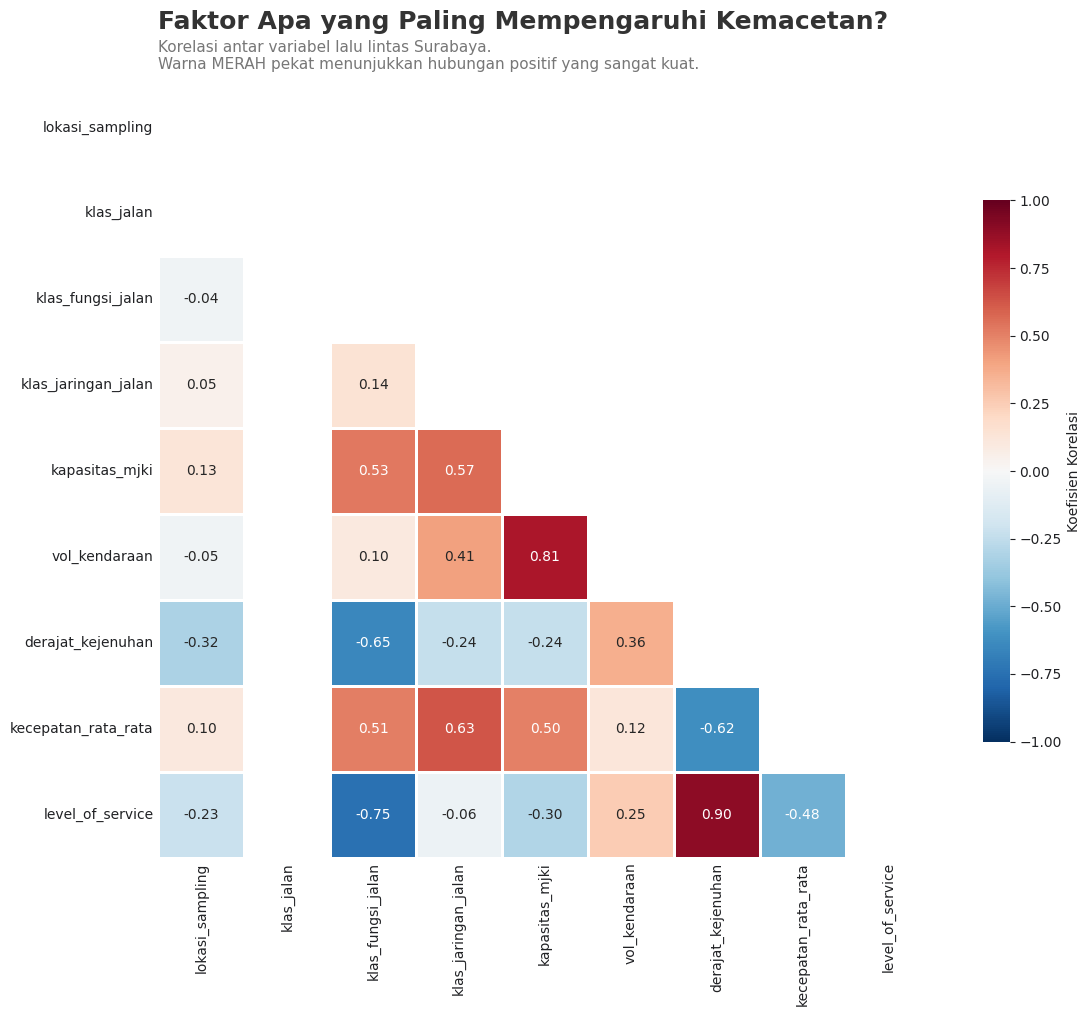

In [ ]:
# 1. Setup Data & Masking
corr = df_clean.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 2. Setup Figure
plt.figure(figsize=(12, 10))

# Plotting 
# Gunakan RdBu_r agar standar (Merah=Positif, Biru=Negatif)
ax = sns.heatmap(corr, 
                 mask=mask, 
                 cmap='RdBu_r', 
                 center=0, 
                 vmin=-1, vmax=1,       
                 square=True, 
                 linewidths=1,          
                 cbar_kws={"shrink": .7, "label": "Koefisien Korelasi"},
                 annot=True, 
                 fmt=".2f", 
                 annot_kws={"size": 10})

# Hapus label X dan Y karena nama kolom sudah ada di ticks
plt.xlabel("")
plt.ylabel("")

# Hapus ticks line yang kaku, sisakan teksnya
plt.tick_params(axis='both', which='both', length=0, labelsize=10)

# JUDUL: Gunakan pad dan loc='left' agar aman (tidak perlu koordinat manual)
# Judul Utama (Insight/Pertanyaan)
plt.title("Faktor Apa yang Paling Mempengaruhi Kemacetan?", 
          fontsize=18, fontweight='bold', loc='left', pad=40, color='#333333')

# Sub-judul (Penjelasan cara baca)
# Gunakan plt.text relative terhadap axes (transform=ax.transAxes) agar responsif
plt.text(x=0, y=1.02, s="Korelasi antar variabel lalu lintas Surabaya.\nWarna MERAH pekat menunjukkan hubungan positif yang sangat kuat.", 
         fontsize=11, alpha=0.8, color='#555555', transform=ax.transAxes)

plt.tight_layout()
plt.show()

In [ ]:
df_clean = df_clean.drop(columns=['klas_jalan'])

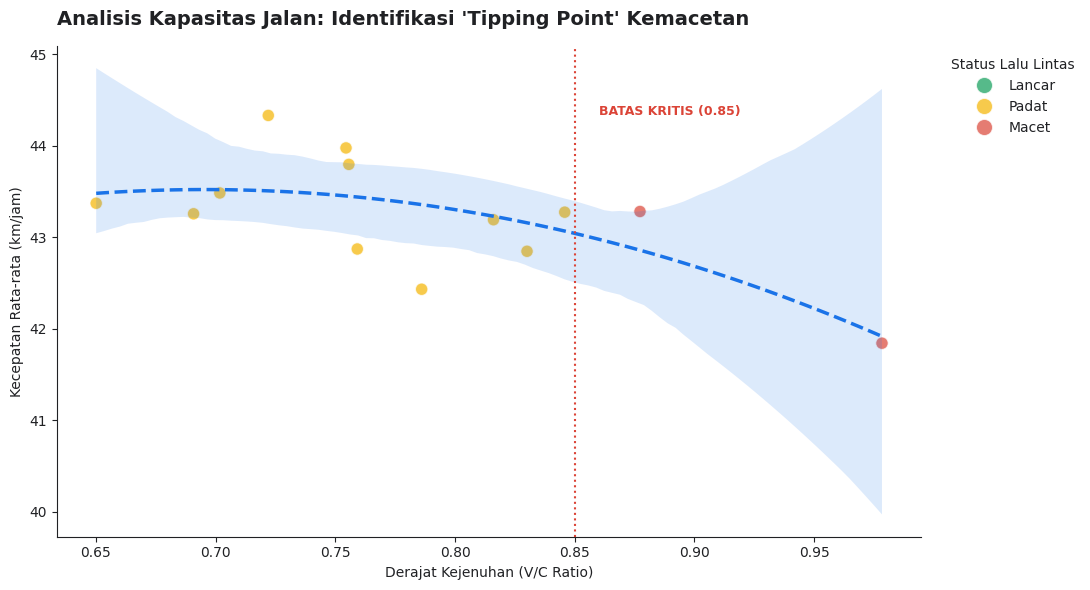

In [ ]:
conditions = [
    (df['derajat_kejenuhan'] < 0.6),
    (df['derajat_kejenuhan'] >= 0.6) & (df['derajat_kejenuhan'] < 0.85),
    (df['derajat_kejenuhan'] >= 0.85)
]
choices = ['Lancar', 'Padat', 'Macet'] 
df['status_lalin'] = np.select(conditions, choices, default='Macet')

# --- 2. PLOTTING ---
plt.figure(figsize=(11, 6)) # LEBARKAN canvas (11 inch) biar legend muat di kanan

# Palet Warna
palette_custom = {'Lancar': '#0F9D58', 'Padat': '#F4B400', 'Macet': '#DB4437'}

# Scatter
sns.scatterplot(data=df, 
                x='derajat_kejenuhan', 
                y='kecepatan_rata_rata',
                hue='status_lalin',
                palette=palette_custom,
                hue_order=['Lancar', 'Padat', 'Macet'], 
                s=80, alpha=0.7, edgecolor='white', linewidth=0.8)

# Trend Line
sns.regplot(data=df, x='derajat_kejenuhan', y='kecepatan_rata_rata', 
            scatter=False, order=2, color='#1A73E8', 
            line_kws={'linestyle':'--', 'linewidth':2.5})

# --- 3. JUDUL & ANOTASI ---
plt.title("Analisis Kapasitas Jalan: Identifikasi 'Tipping Point' Kemacetan", 
          fontsize=14, fontweight='bold', loc='left', pad=15, color='#202124')

plt.axvline(0.85, color='#DB4437', linestyle=':', linewidth=1.5)
plt.text(0.86, df['kecepatan_rata_rata'].max(), 'BATAS KRITIS (0.85)', 
         color='#DB4437', fontweight='bold', fontsize=9)

plt.xlabel('Derajat Kejenuhan (V/C Ratio)')
plt.ylabel('Kecepatan Rata-rata (km/jam)')

# --- 4. THE PRO LEGEND (Right Sidebar Style) ---
# bbox_to_anchor=(1.02, 1) --> Geser ke kanan (1.02) dari batas grafik
# borderaxespad=0 --> Hapus jarak antara grafik dan legend
plt.legend(title="Status Lalu Lintas", 
           title_fontsize=10,
           loc='upper left',           # Patokan pojok kiri atas legend
           bbox_to_anchor=(1.02, 1),   # Taruh di luar grafik sebelah kanan
           frameon=False,              # Hilangkan kotak
           fontsize=10, 
           markerscale=1.3)            # Perbesar titik

sns.despine()
plt.tight_layout() # Otomatis mengatur margin biar legend gak kepotong
plt.show()

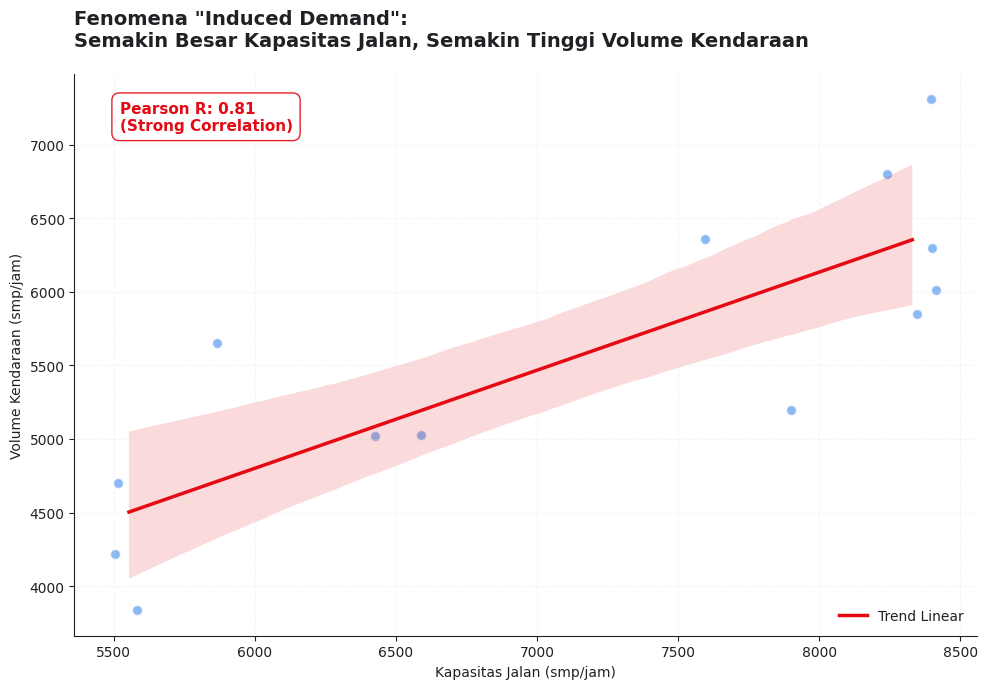

In [ ]:
plt.figure(figsize=(10, 7))

# PLOTTING 
# x_jitter=100: Memberikan "getaran" acak pada sumbu X.
# Ini PENTING untuk data kapasitas yang nilainya diskrit (misal: 2000, 4000).
# Tanpa jitter, ribuan data akan terlihat hanya seperti beberapa garis lurus vertikal.
ax = sns.regplot(data=df_clean, 
                 x='kapasitas_mjki', 
                 y='vol_kendaraan',
                 x_jitter=100,      #  Trik visualisasi agar kepadatan data terlihat
                 scatter_kws={'alpha': 0.5, 's': 50, 'color': '#1A73E8', 'edgecolor': 'w'}, 
                 line_kws={'color': '#E50914', 'linewidth': 2.5, 'label': 'Trend Linear'})   

# HITUNG STATISTIK MENGGUNAKAN FUNGSI CORR()
r_value = df_clean['vol_kendaraan'].corr(df_clean['kapasitas_mjki'])


# Jika R > 0.7 disebut "Strong", jika < 0.3 "Weak"
strength = "Strong" if abs(r_value) > 0.7 else "Moderate"
text_stats = f'Pearson R: {r_value:.2f}\n({strength} Correlation)'

plt.text(0.05, 0.9, text_stats, transform=ax.transAxes, 
         fontsize=11, fontweight='bold', color='#E50914',
         bbox=dict(facecolor='white', alpha=0.9, edgecolor='#E50914', boxstyle='round,pad=0.5'))

# Judul yang menjelaskan fenomena, bukan sekadar nama kolom
plt.title('Fenomena "Induced Demand":\nSemakin Besar Kapasitas Jalan, Semakin Tinggi Volume Kendaraan', 
          fontsize=14, fontweight='bold', loc='left', pad=20, color='#202124')

plt.xlabel('Kapasitas Jalan (smp/jam)')
plt.ylabel('Volume Kendaraan (smp/jam)')

#  FINISHING 
sns.despine()
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(frameon=False, loc='lower right')
plt.tight_layout()
plt.show()

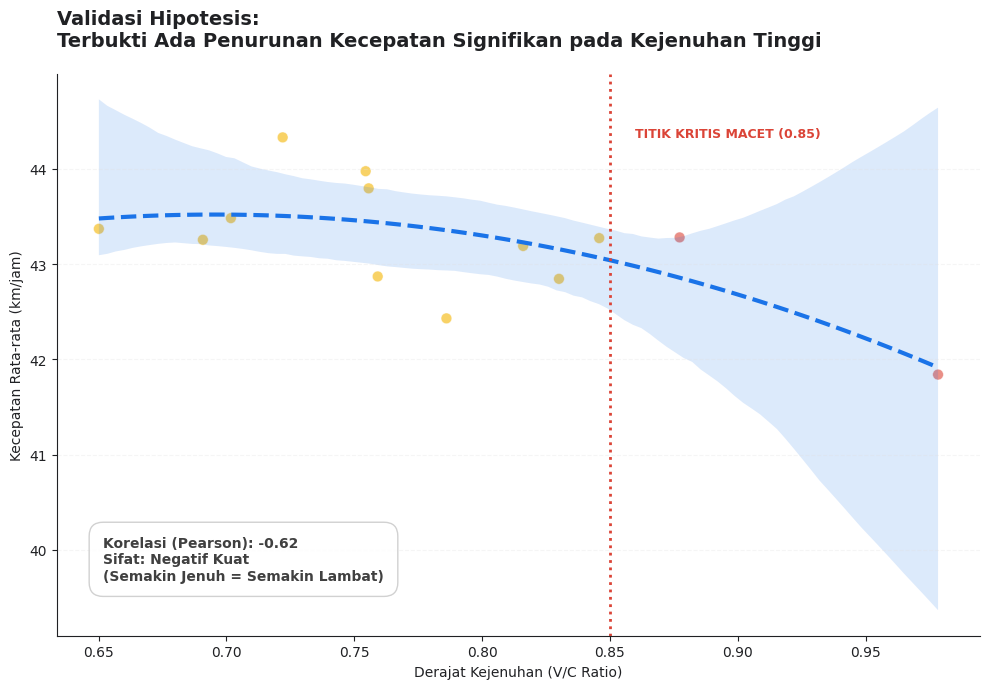

In [ ]:
plt.figure(figsize=(10, 7))

# Hijau (<0.6), Kuning (0.6-0.85), Merah (>0.85)
conditions = [
    (df_clean['derajat_kejenuhan'] < 0.6),
    (df_clean['derajat_kejenuhan'] >= 0.6) & (df_clean['derajat_kejenuhan'] < 0.85),
    (df_clean['derajat_kejenuhan'] >= 0.85)
]
colors_map = ['#0F9D58', '#F4B400', '#DB4437'] # Google Green, Yellow, Red
point_colors = np.select(conditions, colors_map, default='#DB4437')

# 3. PLOTTING SCATTER 
plt.scatter(df_clean['derajat_kejenuhan'], df_clean['kecepatan_rata_rata'], 
            c=point_colors, alpha=0.6, s=60, edgecolors='white', linewidth=0.5)

sns.regplot(data=df_clean, x='derajat_kejenuhan', y='kecepatan_rata_rata', 
            scatter=False, order=2, 
            color='#1A73E8', # Biru Google
            line_kws={'linestyle':'--', 'linewidth':3, 'label': 'Trend (Poly Order 2)'})

#  STATISTIK-
r_val = df_clean['derajat_kejenuhan'].corr(df_clean['kecepatan_rata_rata'])
status_corr = "Kuat" if abs(r_val) > 0.5 else "Lemah"

# Tampilkan Kotak Statistik
stats_text = f"Korelasi (Pearson): {r_val:.2f}\nSifat: Negatif {status_corr}\n(Semakin Jenuh = Semakin Lambat)"
plt.text(0.05, 0.1, stats_text, transform=plt.gca().transAxes, 
         fontsize=10, fontweight='bold', color='#404040',
         bbox=dict(facecolor='white', alpha=0.9, edgecolor='#CCCCCC', boxstyle='round,pad=1'))

#  TITLE & ANOTASI 
plt.title('Validasi Hipotesis: \nTerbukti Ada Penurunan Kecepatan Signifikan pada Kejenuhan Tinggi', 
          fontsize=14, fontweight='bold', loc='left', pad=20, color='#202124')

# Garis Batas Kritis
plt.axvline(0.85, color='#DB4437', linestyle=':', linewidth=2)
plt.text(0.86, df_clean['kecepatan_rata_rata'].max(), 'TITIK KRITIS MACET (0.85)', 
         color='#DB4437', fontweight='bold', fontsize=9)

plt.xlabel('Derajat Kejenuhan (V/C Ratio)')
plt.ylabel('Kecepatan Rata-rata (km/jam)')

# Finishing
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

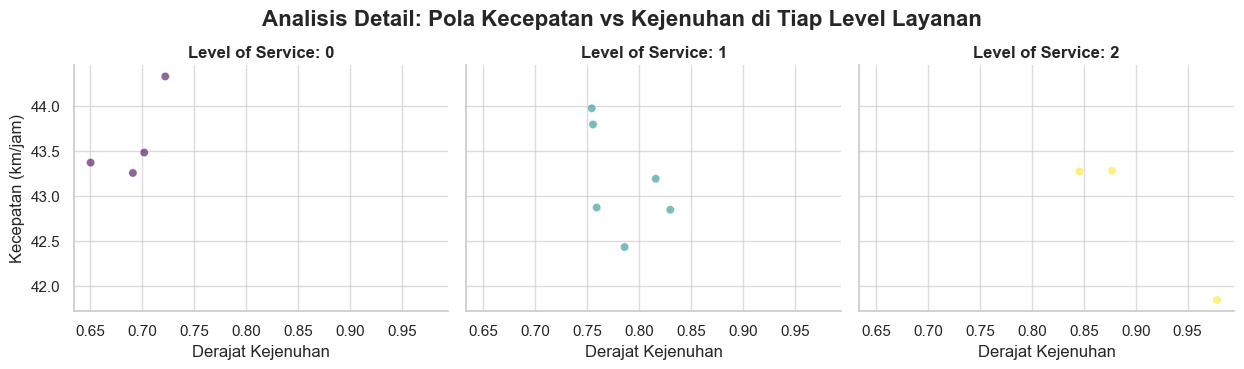

In [ ]:
# Grid
sns.set_theme(style="whitegrid")

# Regplot
g = sns.relplot(
    data=df_clean,
    x='derajat_kejenuhan', 
    y='kecepatan_rata_rata',
    col='level_of_service', #  Pecah per kategori
    col_wrap=3,             # Maksimal 3 grafik ke samping, sisanya ke bawah
    hue='level_of_service', # Tetap warnai biar cantik
    palette='viridis',      # Warna profesional
    height=3.5,             # Tinggi per kotak
    aspect=1.2,             # Lebar per kotak
    alpha=0.6,              # Transparansi
    legend=False            # Gak butuh legend karena judulnya sudah jelas
)

# Rapikan Judul Utama
g.fig.suptitle("Analisis Detail: Pola Kecepatan vs Kejenuhan di Tiap Level Layanan", 
               fontsize=16, fontweight='bold', y=1.05)

# Rapikan label sumbu
g.set_axis_labels("Derajat Kejenuhan", "Kecepatan (km/jam)")
g.set_titles("Level of Service: {col_name}") # Judul tiap kotak kecil

plt.show()

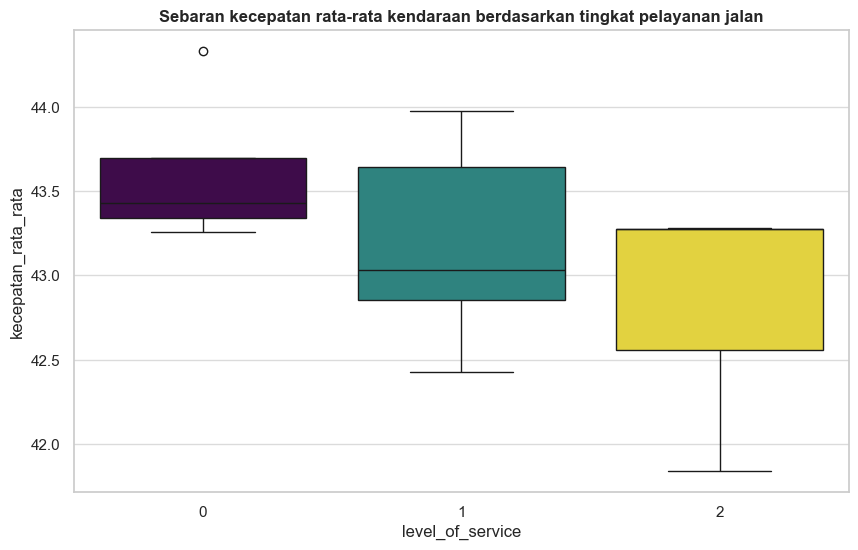

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, 
            x='level_of_service', 
            y='kecepatan_rata_rata', 
            hue='level_of_service',  
            legend=False,            
            palette='viridis')
plt.title('Sebaran kecepatan rata-rata kendaraan berdasarkan tingkat pelayanan jalan')
plt.show()

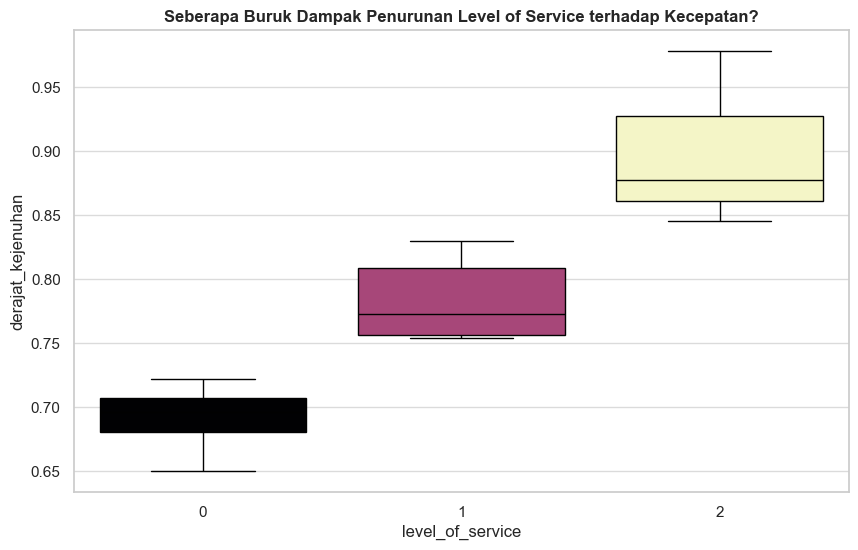

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, 
            x='level_of_service', 
            y='derajat_kejenuhan', 
            hue='level_of_service',  
            legend=False,           
            palette='magma')
plt.title("Seberapa Buruk Dampak Penurunan Level of Service terhadap Kecepatan?")
plt.show()

In [ ]:
# Kita hanya lihat jalanan yang SANGAT MACET (Kejenuhan > 0.8)
macet_parah = df_clean[df_clean['derajat_kejenuhan'] > 0.8]

# Cek lagi korelasinya khusus di kondisi macet
print("Korelasi di kondisi Macet Parah:")
print(macet_parah[['vol_kendaraan', 'kecepatan_rata_rata']].corr())

Korelasi di kondisi Macet Parah:
                     vol_kendaraan  kecepatan_rata_rata
vol_kendaraan             1.000000             0.242854
kecepatan_rata_rata       0.242854             1.000000


### C.3 Multivariate Analysis

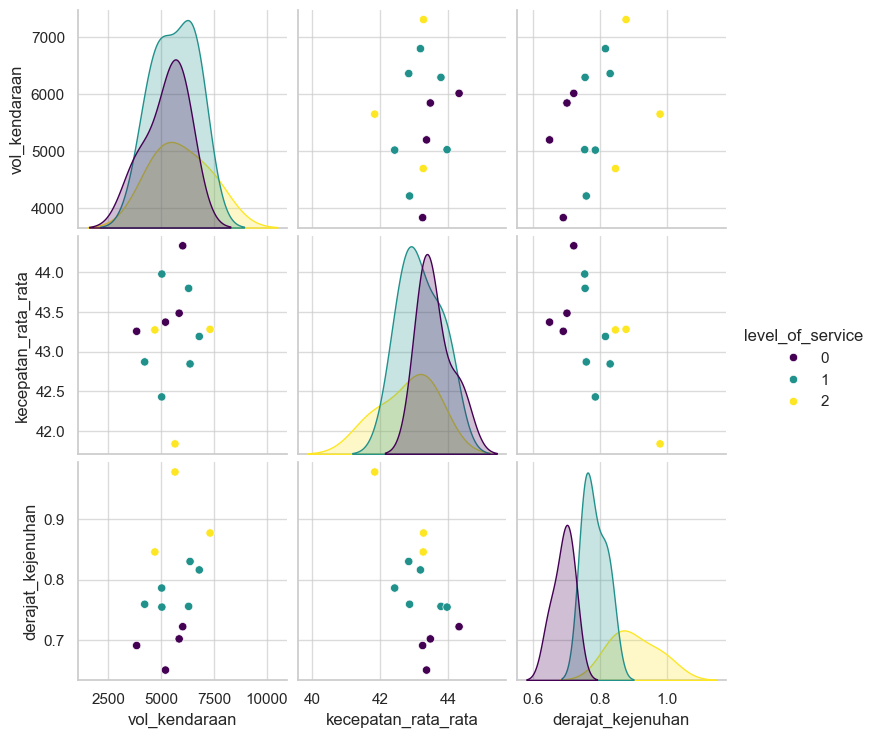

In [ ]:
sns.pairplot(df_clean, 
             hue='level_of_service', # Pembeda warna
             vars=['vol_kendaraan', 'kecepatan_rata_rata', 'derajat_kejenuhan'], # Pilih kolom angka penting aja
             palette='viridis')
plt.show()

## D.Modeling

### D.1 Split Data

In [ ]:
X_data = df_clean.drop(columns={'level_of_service'})
y_data = df_clean['level_of_service']

In [ ]:
def stratified_split(X_data, y_data, train_size=0.8, random_state=42):
    np.random.seed(random_state)

    X_train_list, X_test_list = [],[]
    y_train_list, y_test_list = [],[]
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data==class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        X_train_list.append(X_data.iloc[idx[:split_ratio]])
        X_test_list.append(X_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    X_train = pd.concat(X_train_list).reset_index(drop=True)
    X_test = pd.concat(X_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

### D.2 KNN MODEL

In [ ]:
class KNN:
 def __init__(self, k=3, p=2):
  self.k = k
  self.p = p

 def fit(self, X, y):
  self.X_train = np.array(X)
  self.y_train = np.array(y)

 def predict(self, X_test):

  X_test = np.array(X_test)
  y_pred = []

  for x in X_test:
   prediction = self._predict_single(x)
   y_pred.append(prediction)
  
  return np.array(y_pred)
 
 def predict_single(self, x):
  if self.p == 1:
   distances = np.sum(np.abs(self.X_train - x), axis = 1)
  else:
   distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis = 1))

  # argsort mengembalikan INDEX data yang sudah diurutkan dari jarak terdekat
  # [:self.k] artinya ambil k index pertama saja
  k_indicies = np.argsort(distances)[:self.k]
  # Ambil Label asli dari tetangga tersebut
  k_nearest_labels = self.y_train[k_indicies]
  # np.unique mengembalikan label unik dan jumlah kemunculannya
  unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
  # Cari index di mana counts-nya paling besar (Majority Vote)
  max_count_index = np.argmax(counts)
  # Ambil label pemenang
  most_common_label = unique_labels[max_count_index]
  return most_common_label